In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [ ]:
df=pd.read_csv('/content/NN Project Data - Signal.csv')
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns in data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the parameters are floating point and the signal strength is an integer.


Apart from Signal Strength rest all features are floating point.

In [ ]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Looking the 11 parameters : Parameter 3 ranges between 0 and 1. Maximum value of Parameter 5 is 0.6 Parameter 8 has a very low range between 0.9 and 1.004 Standard deviation is lowest for Parameter 8, it is 0.001887 'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

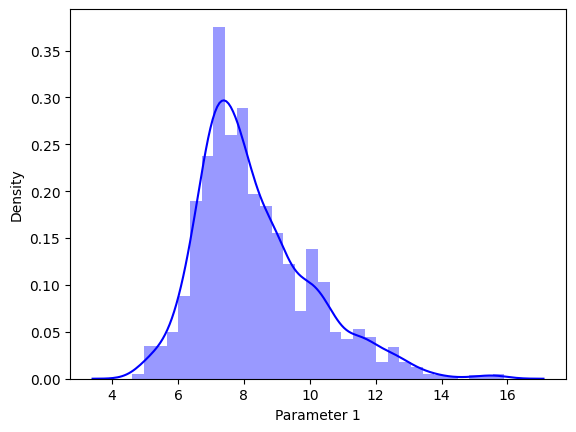

Distribution of  Parameter 1
Mean is: 8.31963727329581
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7410963181276953
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


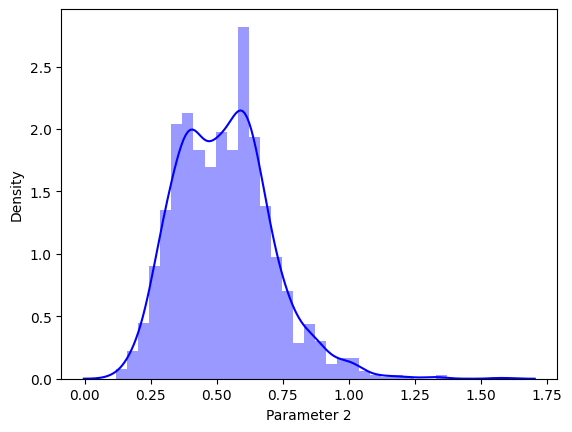

Distribution of  Parameter 2
Mean is: 0.5278205128205128
Median is: 0.52
Mode is: 0    0.6
Name: Parameter 2, dtype: float64
Standard deviation is: 0.17905970415353537
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


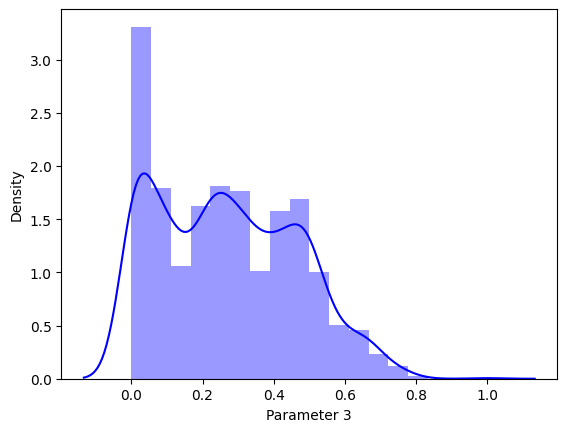

Distribution of  Parameter 3
Mean is: 0.2709756097560976
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.19480113740531857
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


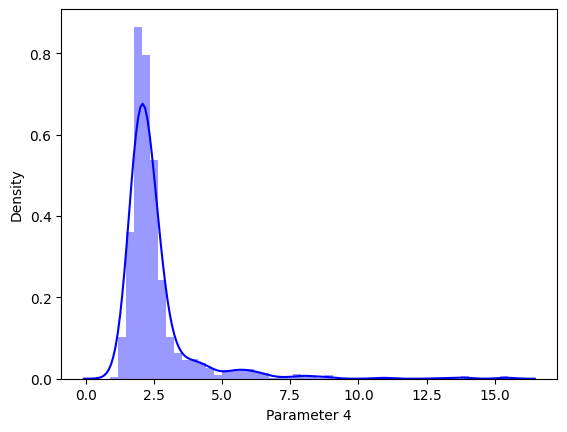

Distribution of  Parameter 4
Mean is: 2.53880550343965
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.4099280595072798
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


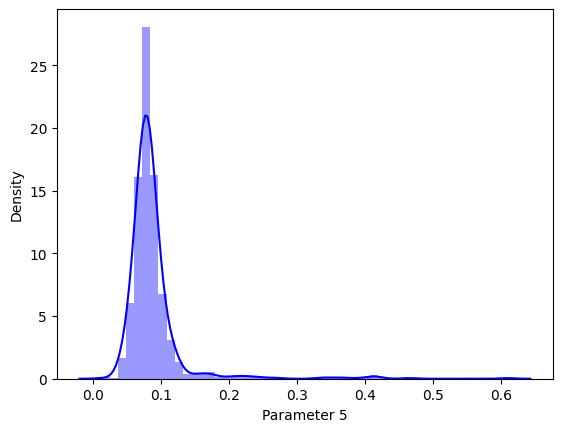

Distribution of  Parameter 5
Mean is: 0.08746654158849279
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.0470653020100901
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


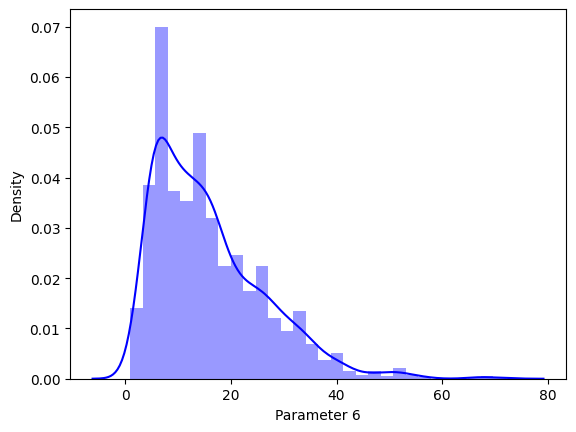

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.460156969809725
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


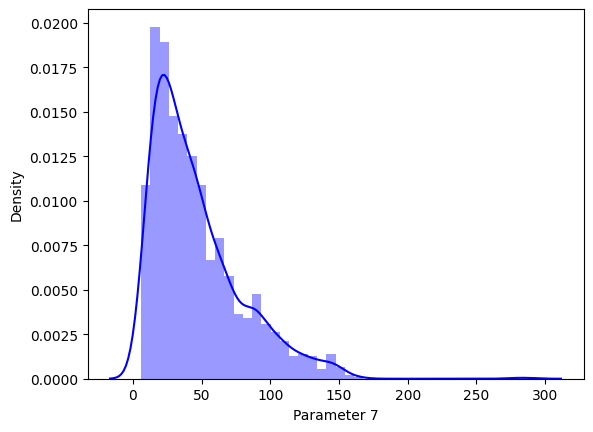

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 32.895324478299074
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


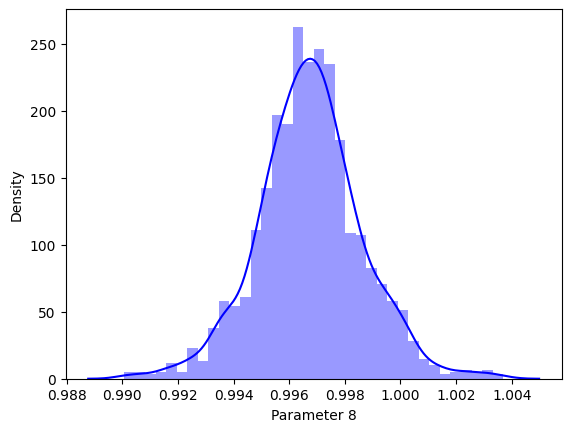

Distribution of  Parameter 8
Mean is: 0.9967466791744841
Median is: 0.99675
Mode is: 0    0.9972
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018873339538425554
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


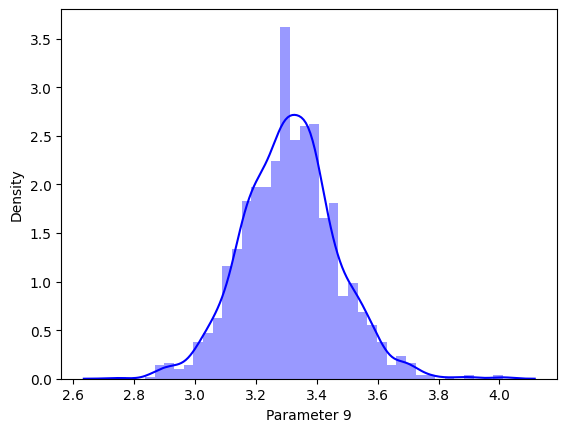

Distribution of  Parameter 9
Mean is: 3.3111131957473416
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15438646490354277
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


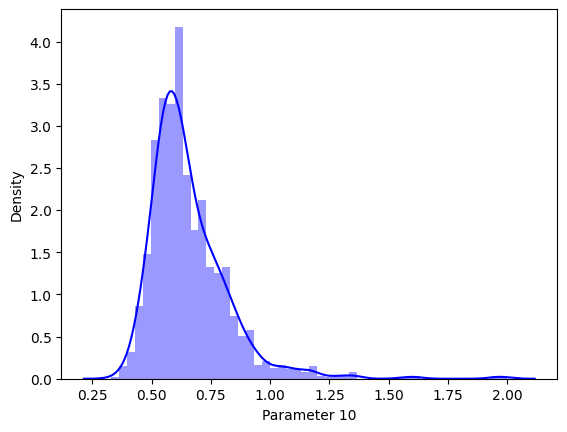

Distribution of  Parameter 10
Mean is: 0.6581488430268917
Median is: 0.62
Mode is: 0    0.6
Name: Parameter 10, dtype: float64
Standard deviation is: 0.16950697959010996
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


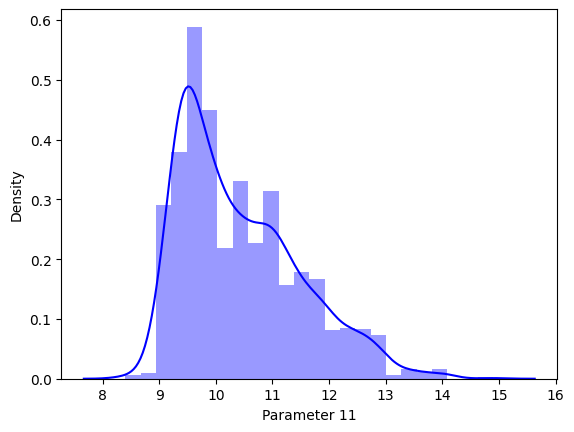

Distribution of  Parameter 11
Mean is: 10.422983114446529
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.0656675818563988
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


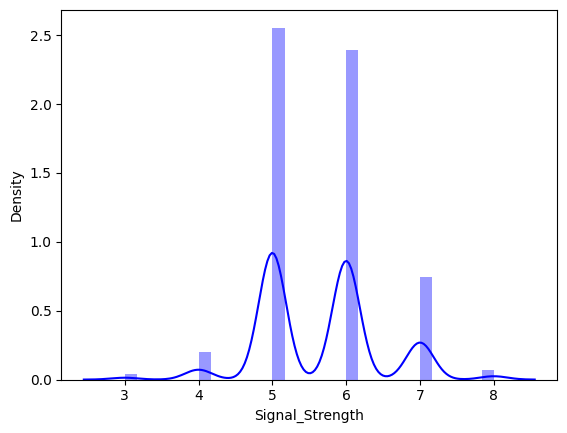

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.807569439734705
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [ ]:
cols = list(df)
for i in np.arange(len(cols)):
    sns.distplot(df[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',df[cols[i]].mean())
    print('Median is:',df[cols[i]].median())
    print('Mode is:',df[cols[i]].mode())
    print('Standard deviation is:',df[cols[i]].std())
    print('Skewness is:',df[cols[i]].skew())
    print('Maximum is:',df[cols[i]].max())
    print('Minimum is:',df[cols[i]].min())

Mean, median and mode are almost overlapping or too close to each other ecept in Parameter 7 Parameter 3 is trimodal and Signal strength is a classification variable. All of them are positively skewed. Standard deviation is maximum for Parameter7, it is 32.895324478299074

<Axes: >

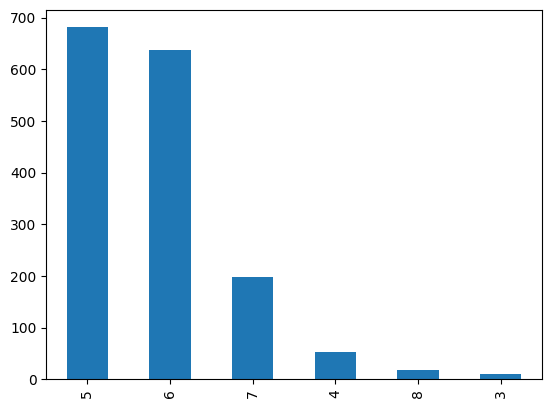

In [ ]:
   # Distibution of the column 'Signal_Strength'
df['Signal_Strength'].value_counts().plot.bar()

class 5.0 in 'Signal_Strength' has the highest count.

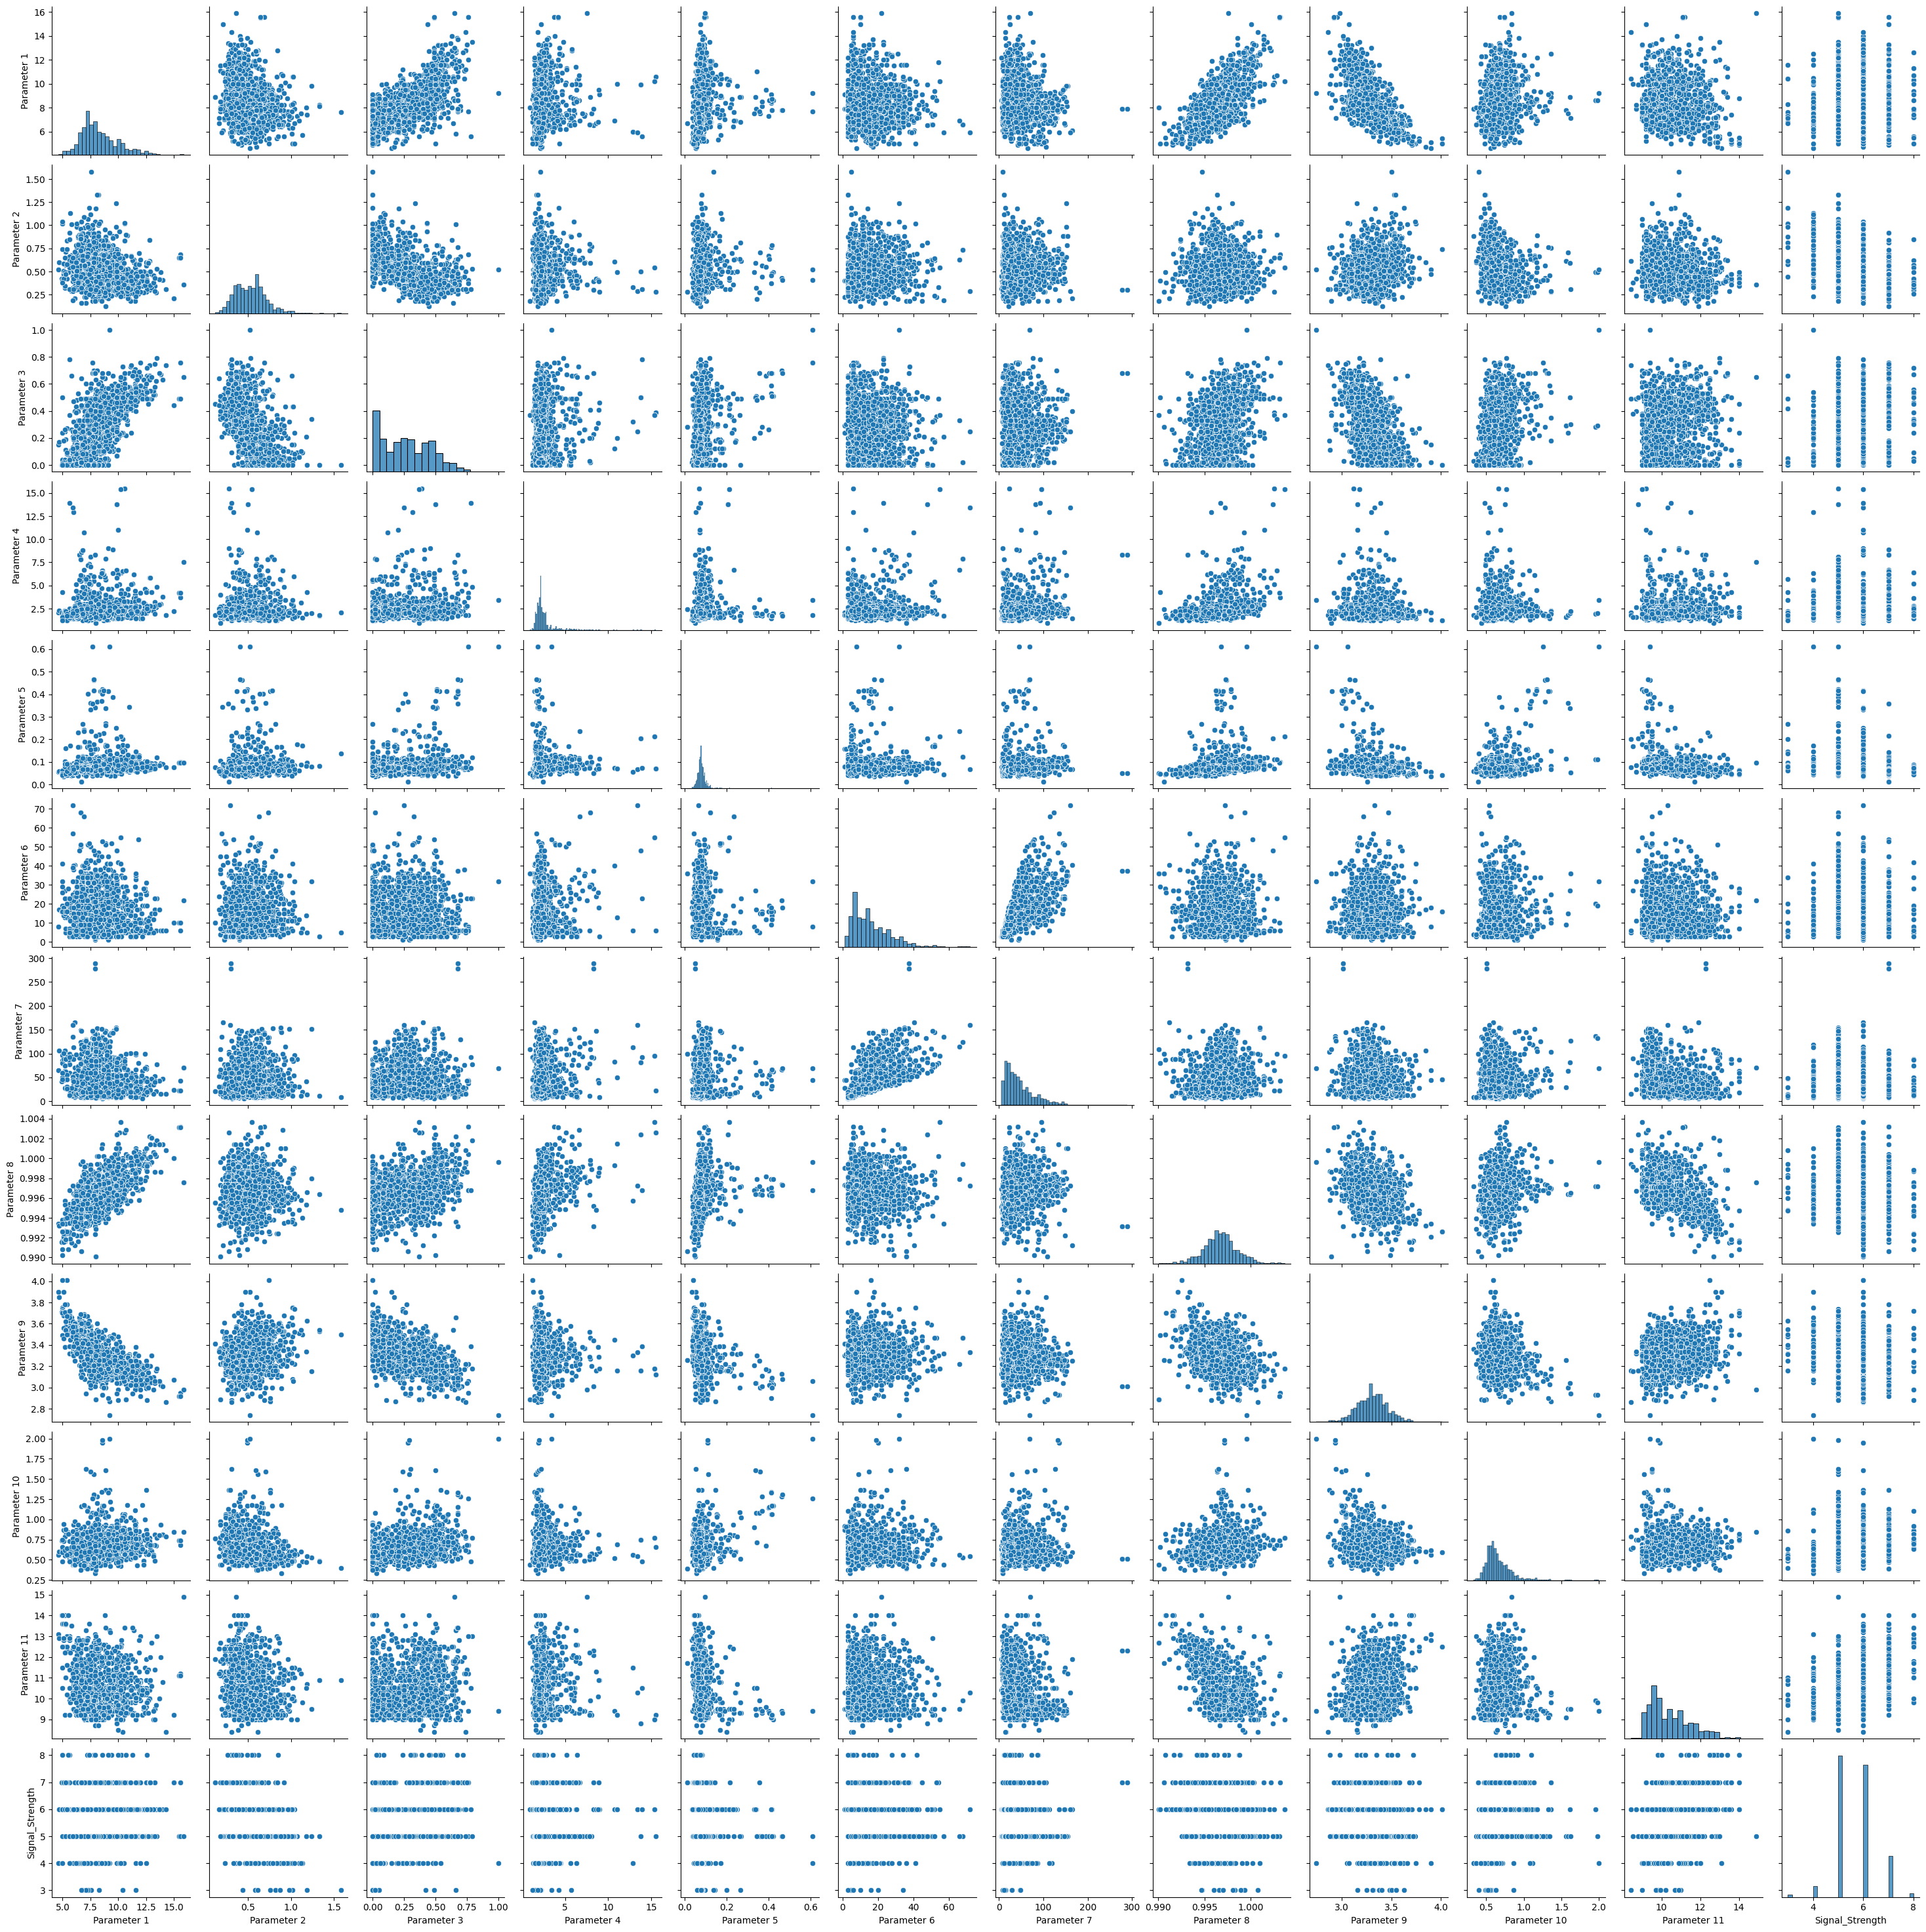

In [ ]:
sns.pairplot(df)

1.Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters 2.Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9. 3.Parameter 4 is has very low correlation with other Parameters.

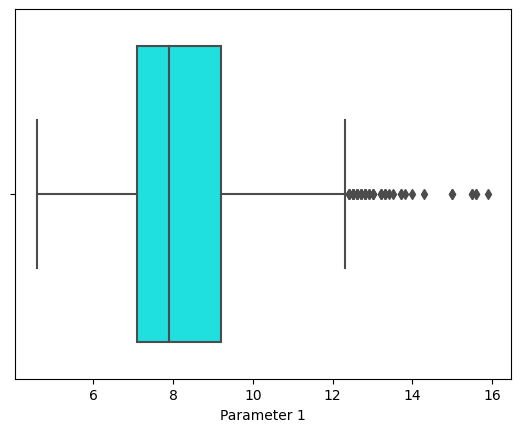

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


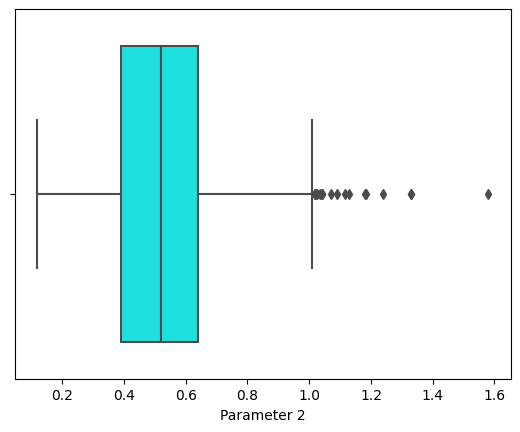

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


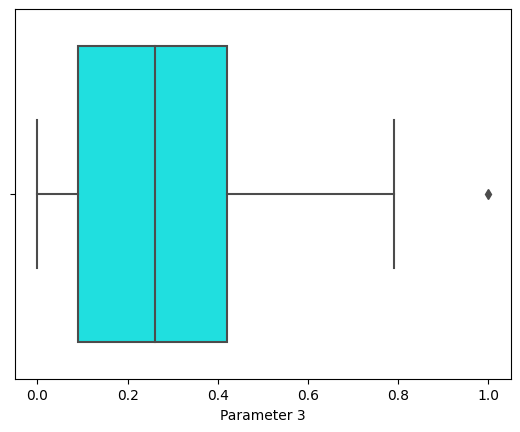

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


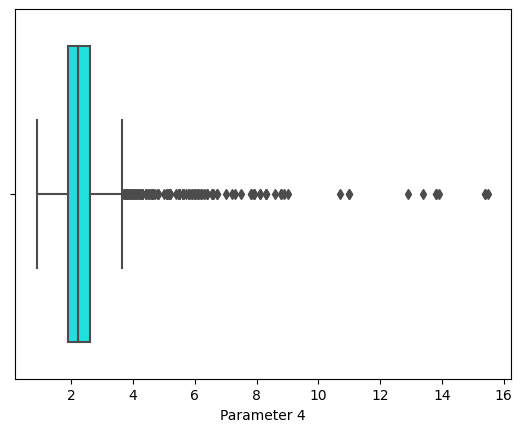

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


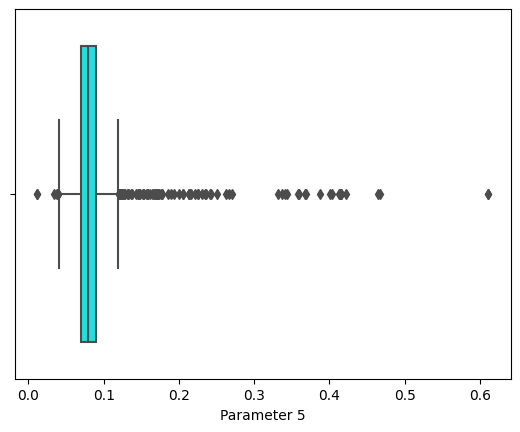

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


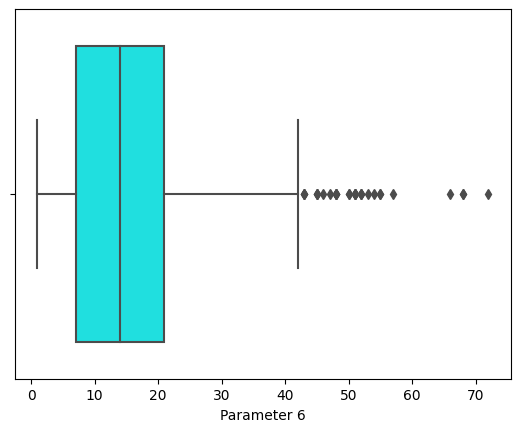

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


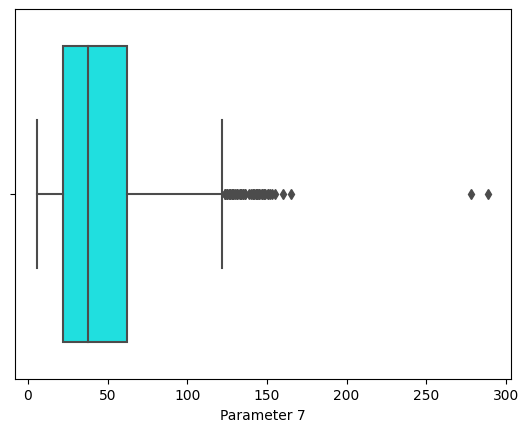

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


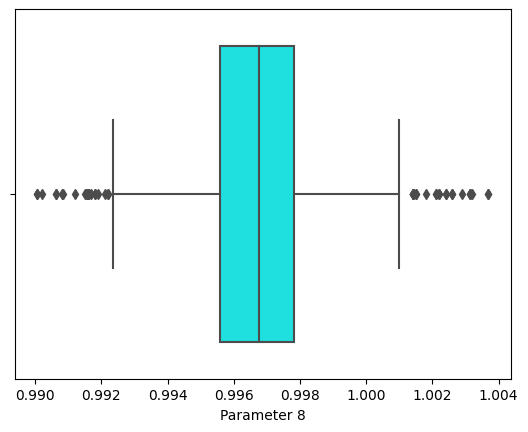

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


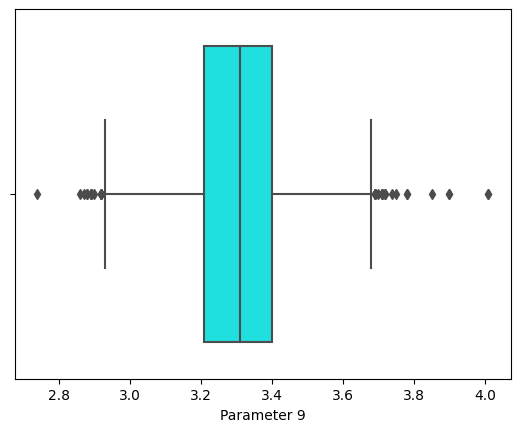

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


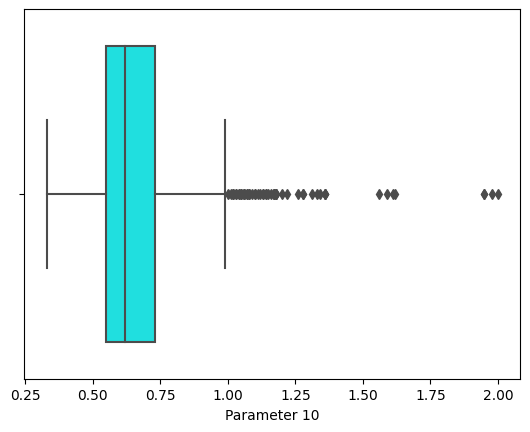

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


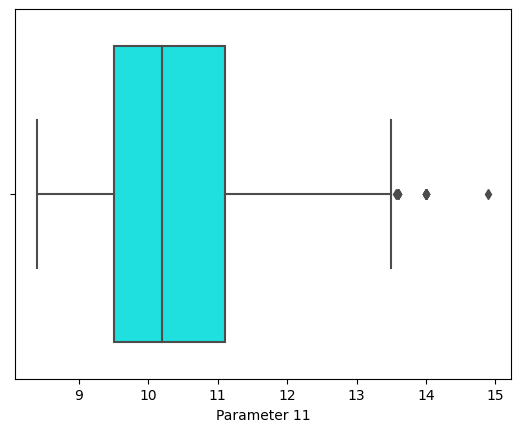

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


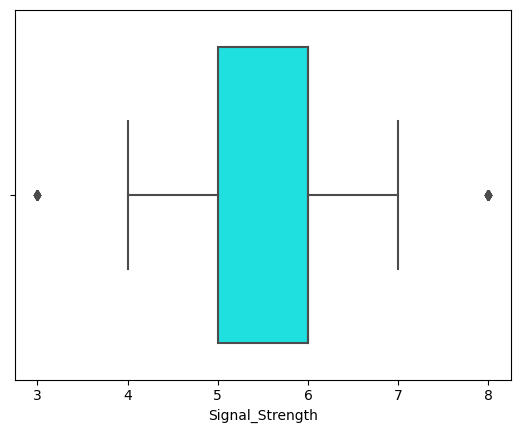

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [ ]:
# Checking the presence of outliers
l = len(df)
col = list(df.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= df[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = df[col[i]].quantile(0.25)
    Q2 = df[col[i]].quantile(0.50)
    Q3 = df[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (df[col[i]] < (Q1 - 1.5 *IQR)) |(df[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.

In [ ]:
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [ ]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(df,'update')
if count>0:
    print('Updating dataset')
    mydata=df

Updating dataset


<Axes: >

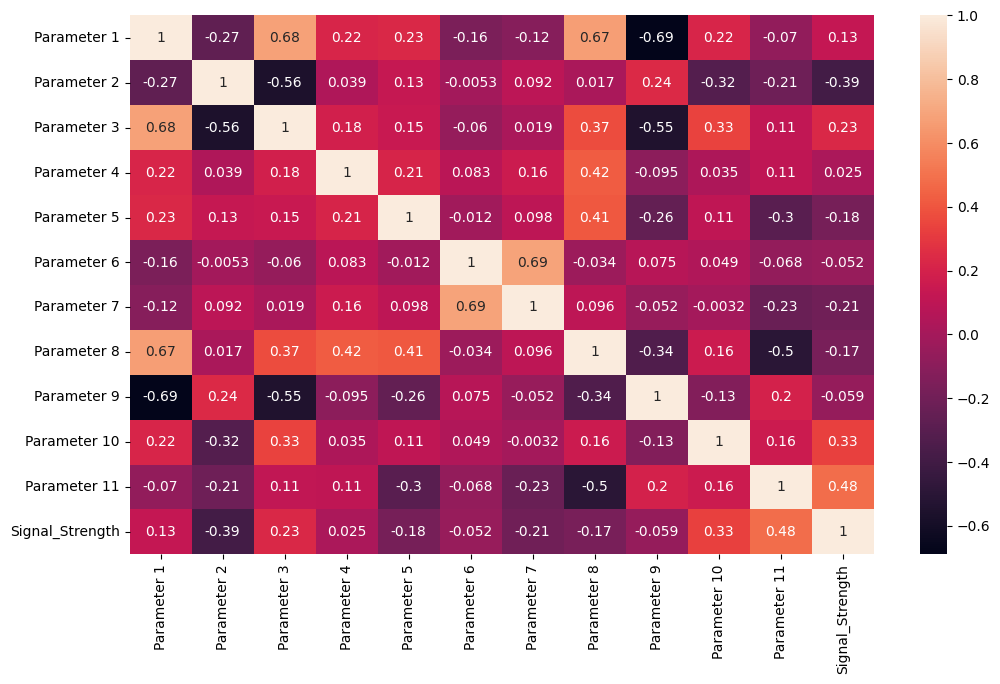

In [ ]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

Since high correlation coefficient value lies between � 0.50 and � 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

In [ ]:
df.shape

(1599, 12)

In [ ]:
df['Signal_Strength'] = df['Signal_Strength'].apply(lambda x:int(x))

[0.07480583 0.10373672 0.07576219 0.06456867 0.07982824 0.06642461
 0.10253213 0.09267206 0.0785739  0.10991885 0.15117681]


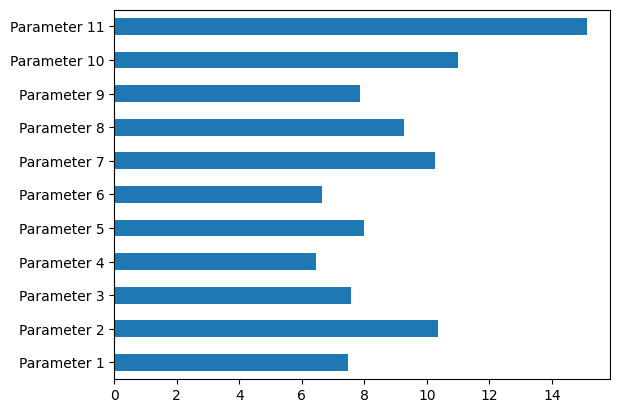

In [ ]:
# Feature Importance

# Independent variables
X=df.drop('Signal_Strength',axis=1)      

# Target variable
Y=df['Signal_Strength']                   


from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,Y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#plotting graph of feature importances
feat_importances = pd.Series(model.feature_importances_*100, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()


In [ ]:


# Independent variables
X=df.drop('Signal_Strength',axis=1)  

# Target variable
Y=df['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, test_size=0.3, random_state=12)

In [ ]:
"""# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)  """

In [ ]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119, 8)
(480, 8)


In [ ]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(8, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1536      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                

In [ ]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
6/6 [==============================] - 1s 34ms/step - loss: 2.0735 - accuracy: 0.3432 - val_loss: 2.0602 - val_accuracy: 0.4708
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 2.0476 - accuracy: 0.4281 - val_loss: 2.0166 - val_accuracy: 0.4354
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 1.9849 - accuracy: 0.4218 - val_loss: 1.9051 - val_accuracy: 0.4354
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 1.8341 - accuracy: 0.4218 - val_loss: 1.6571 - val_accuracy: 0.4354
Epoch 5/400
6/6 [==============================] - 0s 10ms/step - loss: 1.5553 - accuracy: 0.4218 - val_loss: 1.3557 - val_accuracy: 0.4354
Epoch 6/400
6/6 [==============================] - 0s 9ms/step - loss: 1.3639 - accuracy: 0.4218 - val_loss: 1.2559 - val_accuracy: 0.4354
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 1.3115 - accuracy: 0.4111 - val_loss: 1.1905 - val_accuracy: 0.4146
Epoch 8/400
6/6 [========

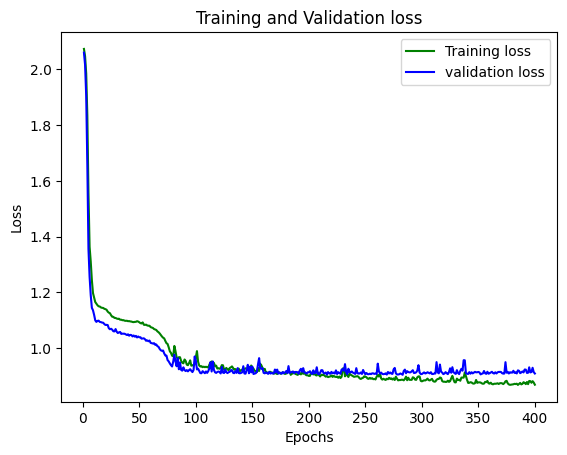

In [ ]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

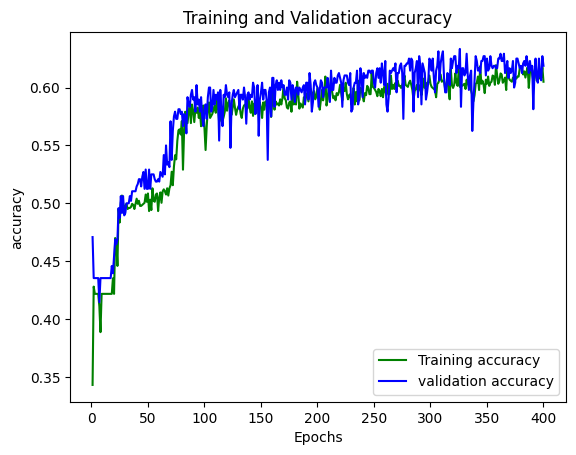

In [ ]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 60.21%


#Part B

### <font color='red'>Step 1 </font>Import neccessary libaries and read the data from the h5py file and understand the train/test splits

#### Importing Libraries

In [ ]:
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

%matplotlib inline


#### Reading Data

In [ ]:
# open the file as readonly
path='/content/drive/MyDrive/aaa_dataset/Autonomous_Vehicles_SVHN_single_grey1.h5'
h5f = h5py.File(path,'r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
# load the already splited train, validation and test data
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


In [ ]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


- The training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.
- The test dataset(X_test) has 18k records each record being 32x32 in size.
- y_train, y_test contain label for the given image matrix.


Label for the image is 6


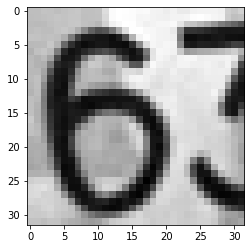

In [ ]:
plt.imshow(X_train[1],cmap='gray')
print(f'Label for the image is {y_train[1]}')

- We can clearly see that we have a partial view of digit 3, that is Noise

### Lets Check Few more Images

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


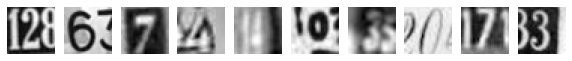

In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()


* thus we can conclude there are lots of noise in data images

### <font color='red'>Step 2 </font>Reshape and normalize the train and test features

* Re-shape

In [ ]:
# RESHAPE 2D - 32*32 into 1D - 1024
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


* Normalize the values

In [ ]:
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Min value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Min value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [ ]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


### <font color='red'>Step 3 </font>One hot encode the labels for train and test data 

In [ ]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


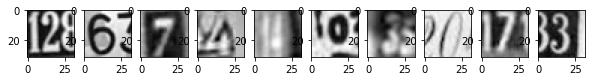

In [ ]:
#cross check if we did all right
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

### <font color='red'>Step 4 </font>Model Creations
### Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

In [ ]:
def model(iterations, lr, Lambda, verb=0, eval_test=False):
    scores=[]
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(lr=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])
    
    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

#### Let us try with very low learning rate and zero regularization.

In [ ]:
iterations = 1
lr=0.0001
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 4s 2ms/step - loss: 2.2950 - accuracy: 0.1566

Loss is 2.294973134994507 and Accuracy is 0.15656666457653046


- Loss is pretty resonable and so is the accuracy which is probability of being a certain digit among 10 classes is 10%(equal for all classes).
- Loss is here calculated via the softmax and crossentropy which is basically -y.ln(0.10) .

#### Lets try Increasing learning Rate, that should increase our loss, this will act as cross validation

In [ ]:
iterations = 1
lr=1e3
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000

Loss is nan and Accuracy is 0.10000000149011612


* Loss Exploded thus a great sign that we are moving in correct direction
* So our Model is behaving right

### <font color='red'>Step 4 </font>Hyperparameter Tunning
- We can start with coarse values and then tune the model with fine values.

In [ ]:
#let's narrow down our search a bit
iterations = 50
lr=1e-4
Lambda=1e-7
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5106 - accuracy: 0.8478
Loss is 0.5105720162391663 and Accuracy is 0.8478166460990906


* With random hit, we get 80% accuracy that seems quite right, let's try few more experiments

In [ ]:
iterations = 10
lr=2
Lambda=1e-2
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

1875/1875 [==============================] - 4s 2ms/step - loss: 8176.1177 - accuracy: 0.1000
Loss is 8176.11767578125 and Accuracy is 0.10000000149011612


- Loss is too high as Learning rate=2 is too high for model.

#### Trying using random value in a certain range

In [ ]:
import math
results =[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0,1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    iterations = 30
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.8213
Loss is 0.5875843167304993 and Accuracy is 0.8213000297546387 with learing rate 0.00010890857864422677 and Lambda 0.001543877107021771

1875/1875 [==============================] - 4s 2ms/step - loss: 1.2397 - accuracy: 0.5827
Loss is 1.2397056818008423 and Accuracy is 0.5827166438102722 with learing rate 0.006751974462447709 and Lambda 3.164801144170382e-06

1875/1875 [==============================] - 4s 2ms/step - loss: 0.7781 - accuracy: 0.7695
Loss is 0.7781275510787964 and Accuracy is 0.7695333361625671 with learing rate 0.002041650159910327 and Lambda 4.353577153352183e-06

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3477 - accuracy: 0.1000
Loss is 2.347700357437134 and Accuracy is 0.10000000149011612 with learing rate 0.40659450606625586 and Lambda 2.909418657814515e-06

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1000
Loss 

* We get good results in range 
1. Learning Rate = "0.008 to 0.002" 
2. Lambda = 1e-3 to 1e-5

In [ ]:
import math
results =[]
for i in range(20):
    lr=math.pow(10, np.random.uniform(-4.0,-2.0))
    Lambda = math.pow(10, np.random.uniform(-5,-3))
    iterations = 50
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4487 - accuracy: 0.8674
Loss is 0.44873788952827454 and Accuracy is 0.8673999905586243 with learing rate 0.00013038300490252029 and Lambda 0.0003682967676594277

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5664 - accuracy: 0.8291
Loss is 0.5664196610450745 and Accuracy is 0.8291000127792358 with learing rate 0.002087622725795199 and Lambda 0.0002600336620739132

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5030 - accuracy: 0.8496
Loss is 0.5029651522636414 and Accuracy is 0.8496000170707703 with learing rate 0.00022137091117065269 and Lambda 1.6077232761208093e-05

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5410 - accuracy: 0.8456
Loss is 0.5409570932388306 and Accuracy is 0.8456000089645386 with learing rate 0.0002295530661644233 and Lambda 0.00040389122614031706

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5530 - accuracy: 0.83

#### Values lr = 0.001798 and Lambda = 0.000878 seem a good fit. Let's train this model deep for that.[](http://)

In [ ]:
lr= 0.001798
Lambda= 0.000878
iterations = 100 #Since we have used early stopping so it will halt 
eval_test= True
scores = model(iterations, lr, Lambda,verb=0, eval_test=True)

In [ ]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.4639461934566498 Accuracy is 0.8597142696380615

Validation Dataset Loss is 0.5615398287773132 Accuracy is 0.84170001745224

Test Dataset Loss is 0.7892579436302185 Accuracy is 0.7996666431427002

